In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:09<00:00, 135MB/s]
100% 812M/812M [00:09<00:00, 85.2MB/s]


In [9]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [10]:
from zipfile import ZipFile
dataset  = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [11]:
from zipfile import ZipFile
dataset  = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [12]:
import os

# counting number of files in train folder
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images ',file_count)

Number of images  25000


In [13]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.5800.jpg', 'cat.9283.jpg', 'dog.11854.jpg', 'dog.8235.jpg', 'cat.9470.jpg', 'dog.5951.jpg', 'cat.2087.jpg', 'cat.9047.jpg', 'dog.8844.jpg', 'dog.11640.jpg', 'cat.1358.jpg', 'dog.56.jpg', 'cat.9181.jpg', 'dog.10206.jpg', 'dog.11595.jpg', 'cat.9184.jpg', 'dog.9399.jpg', 'cat.12487.jpg', 'cat.7612.jpg', 'dog.3087.jpg', 'dog.1278.jpg', 'cat.5923.jpg', 'cat.12152.jpg', 'cat.12495.jpg', 'cat.7465.jpg', 'cat.10803.jpg', 'dog.1027.jpg', 'cat.4485.jpg', 'dog.12365.jpg', 'cat.6583.jpg', 'cat.2260.jpg', 'dog.9167.jpg', 'cat.8116.jpg', 'dog.8139.jpg', 'cat.1275.jpg', 'cat.10431.jpg', 'cat.6540.jpg', 'dog.8363.jpg', 'dog.8087.jpg', 'cat.3886.jpg', 'cat.10238.jpg', 'dog.2736.jpg', 'cat.1190.jpg', 'dog.10188.jpg', 'cat.6040.jpg', 'cat.7049.jpg', 'dog.2269.jpg', 'cat.11503.jpg', 'dog.11980.jpg', 'cat.8947.jpg', 'cat.8693.jpg', 'dog.5886.jpg', 'dog.8186.jpg', 'dog.8431.jpg', 'dog.6768.jpg', 'dog.1948.jpg', 'dog.7520.jpg', 'cat.6966.jpg', 'dog.6111.jpg', 'cat.10532.jpg', 'dog.6706.jpg', 'cat.1685.

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

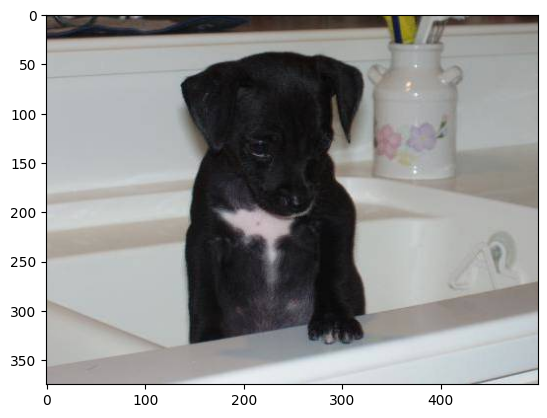

In [16]:
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

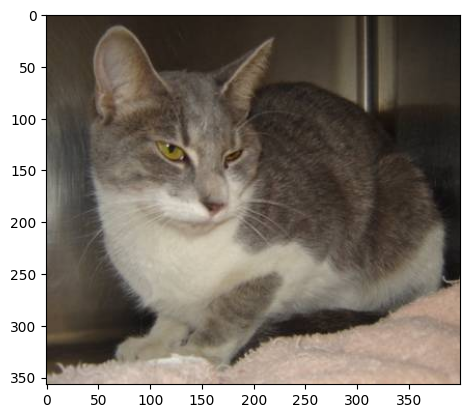

In [17]:
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [18]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
cat
dog
dog
cat


In [19]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [20]:
os.mkdir('/content/image resized')

In [22]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

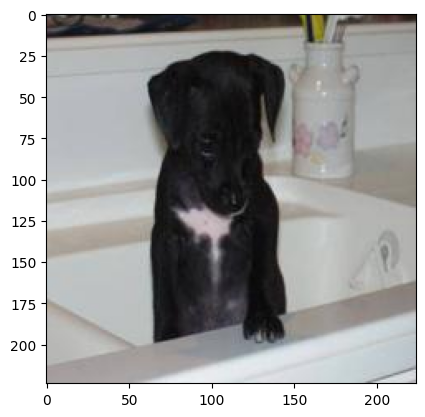

In [23]:
img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

In [28]:
filenames = os.listdir('/content/image resized/')

 # cat - 0
 # dog - 1

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [29]:
print(filenames[0:5])
print(len(filenames))

['cat.5800.jpg', 'cat.9283.jpg', 'dog.11854.jpg', 'dog.8235.jpg', 'cat.9470.jpg']
2000


In [30]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 1, 0]
2000


In [31]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1003  997]


In [34]:
import cv2
import glob

In [35]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [36]:
print(dog_cat_images)

[[[[ 97 114 123]
   [101 118 127]
   [109 126 135]
   ...
   [ 92 102 102]
   [ 92 100  99]
   [ 77  85  84]]

  [[ 98 115 124]
   [ 93 110 119]
   [101 118 127]
   ...
   [109 119 119]
   [111 119 118]
   [ 87  95  94]]

  [[104 119 128]
   [ 92 107 116]
   [ 99 115 122]
   ...
   [122 130 130]
   [124 129 130]
   [ 98 103 104]]

  ...

  [[ 57  61  72]
   [ 60  64  75]
   [ 67  69  79]
   ...
   [ 59  72  80]
   [102 114 120]
   [127 139 145]]

  [[ 60  62  73]
   [ 68  70  81]
   [ 75  76  86]
   ...
   [ 43  56  64]
   [ 92 104 110]
   [121 132 136]]

  [[ 51  53  64]
   [ 59  61  72]
   [ 67  66  76]
   ...
   [ 16  29  37]
   [ 82  92  99]
   [110 121 125]]]


 [[[ 76  94 101]
   [ 80  98 105]
   [ 80  98 105]
   ...
   [ 77  96 104]
   [ 81 100 108]
   [155 174 182]]

  [[ 71  89  96]
   [ 76  94 101]
   [ 78  96 103]
   ...
   [ 78  97 105]
   [ 81 100 108]
   [154 173 181]]

  [[ 67  85  92]
   [ 72  90  97]
   [ 75  93 100]
   ...
   [ 84 103 111]
   [ 85 104 112]
   [154 173

In [37]:
type(dog_cat_images)

numpy.ndarray

In [38]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [40]:
X = dog_cat_images
print(labels)
Y = np.asarray(labels)

[0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [43]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [44]:
import tensorflow as tf
import tensorflow_hub as hub

In [45]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [46]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [47]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [48]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 100s 2s/step - loss: 0.1870 - acc: 0.9200
Epoch 2/5
50/50 [==============================] - 90s 2s/step - loss: 0.0545 - acc: 0.9831
Epoch 3/5
50/50 [==============================] - 81s 2s/step - loss: 0.0412 - acc: 0.9887
Epoch 4/5
50/50 [==============================] - 83s 2s/step - loss: 0.0296 - acc: 0.9937
Epoch 5/5
50/50 [==============================] - 76s 2s/step - loss: 0.0239 - acc: 0.9950


In [49]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc) # evaluating the training loss,accuracy

13/13 [==============================] - 20s 1s/step - loss: 0.0758 - acc: 0.9700
Test Loss = 0.0757671445608139
Test Accuracy = 0.9700000286102295


Path of the image to be predicted: /content/cat.jpeg


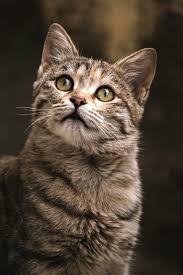

1/1 [==============================] - 1s 1s/step
[[ 3.529199 -6.024658]]
0
The image represents a Cat


In [50]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')